In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import dmba
from dmba import classificationSummary
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import classification_report

In [3]:
#hurricane csv is loaded and converted into a dataframe, first 5 rows are displayed. 
hurricane = 'hurricanes7.csv'
df = pd.read_csv(hurricane)

df.head()

,ATCF,Name,RecordNum,MaxWind,MinPressure,NextWind,NextWindHigher,Elevation,DeepOcean,Speed,Size34,Size50,Size64,WindInc,PressureInc,Size34Inc,Size50Inc,Size64Inc,ElevationInc,SpeedInc
0,AL072008,GUSTAV,1,25,1008,30,1,-5050,1,0,0,0,0,0,0,0,0,0,0,0
1,AL072008,GUSTAV,2,30,1005,35,1,-4786,1,13,0,0,0,5,-3,0,0,0,264,13
2,AL072008,GUSTAV,3,35,1002,50,1,-3922,1,12,60,0,0,5,-3,60,0,0,864,-1
3,AL072008,GUSTAV,4,50,996,60,1,-3826,1,11,75,20,0,15,-6,15,20,0,96,-1
4,AL072008,GUSTAV,5,60,991,75,1,-3900,1,9,75,20,0,10,-5,0,0,0,-74,-2


In [4]:
#here are some information and attributes of the dataset
print( df.info(), '\n')
print("dimensions of the data:", '\n', df.shape, '\n')
print("number of missing values of the data:", '\n', df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7726 entries, 0 to 7725
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ATCF            7726 non-null   object
 1   Name            7726 non-null   object
 2   RecordNum       7726 non-null   int64 
 3   MaxWind         7726 non-null   int64 
 4   MinPressure     7726 non-null   int64 
 5   NextWind        7726 non-null   int64 
 6   NextWindHigher  7726 non-null   int64 
 7   Elevation       7726 non-null   int64 
 8   DeepOcean       7726 non-null   int64 
 9   Speed           7726 non-null   int64 
 10  Size34          7726 non-null   int64 
 11  Size50          7726 non-null   int64 
 12  Size64          7726 non-null   int64 
 13  WindInc         7726 non-null   int64 
 14  PressureInc     7726 non-null   int64 
 15  Size34Inc       7726 non-null   int64 
 16  Size50Inc       7726 non-null   int64 
 17  Size64Inc       7726 non-null   int64 
 18  Elevatio

In [5]:
#This is the summary statistics of the dataset
df.describe()

,RecordNum,MaxWind,MinPressure,NextWind,NextWindHigher,Elevation,DeepOcean,Speed,Size34,Size50,Size64,WindInc,PressureInc,Size34Inc,Size50Inc,Size64Inc,ElevationInc,SpeedInc
count,7726.000000,7726.000000,7726.000000,7726.000000,7726.000000,7726.000000,7726.000000,7726.000000,7726.000000,7726.000000,7726.000000,7726.000000,7726.000000,7726.000000,7726.000000,7726.000000,7726.000000,7726.000000
mean,3863.500000,48.893347,993.732591,47.936189,0.257442,-3328.790577,0.860083,11.299508,146.713565,41.721978,12.247476,0.049185,-0.160109,1.935672,0.407714,0.038830,44.514108,0.537406
std,2230.448423,24.387349,18.599125,25.661898,0.437253,2105.282834,0.346924,7.728658,172.013907,94.580216,68.813074,5.341797,3.411022,101.088915,90.294363,87.320786,920.229444,3.523581
min,1.000000,15.000000,908.000000,0.000000,0.000000,-8369.000000,0.000000,0.000000,-1998.000000,-1998.000000,-1998.000000,-55.000000,-32.000000,-2328.000000,-2148.000000,-2108.000000,-7613.000000,-28.000000
25%,1932.250000,30.000000,987.000000,30.000000,0.000000,-5074.750000,1.000000,6.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-179.000000,-1.000000
50%,3863.500000,40.000000,1000.000000,40.000000,0.000000,-4076.000000,1.000000,10.000000,110.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000
75%,5794.750000,60.000000,1007.000000,60.000000,1.000000,-1260.750000,1.000000,14.000000,220.000000,70.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,245.000000,2.000000
max,7726.000000,160.000000,1021.000000,160.000000,1.000000,2803.000000,1.000000,58.000000,1440.000000,510.000000,300.000000,35.000000,37.000000,2358.000000,2168.000000,2108.000000,5414.000000,29.000000


In [6]:
#dataframe that only contains the columns that have numerical values
num_df = df.iloc[:,2:]

array([[<Axes: title={'center': 'MaxWind'}>,
        <Axes: title={'center': 'MinPressure'}>,
        <Axes: title={'center': 'NextWind'}>,
        <Axes: title={'center': 'NextWindHigher'}>],
       [<Axes: title={'center': 'Elevation'}>,
        <Axes: title={'center': 'DeepOcean'}>,
        <Axes: title={'center': 'Speed'}>,
        <Axes: title={'center': 'Size34'}>],
       [<Axes: title={'center': 'Size50'}>,
        <Axes: title={'center': 'Size64'}>,
        <Axes: title={'center': 'WindInc'}>,
        <Axes: title={'center': 'PressureInc'}>],
       [<Axes: title={'center': 'Size34Inc'}>,
        <Axes: title={'center': 'Size50Inc'}>,
        <Axes: title={'center': 'Size64Inc'}>,
        <Axes: title={'center': 'ElevationInc'}>],
       [<Axes: title={'center': 'SpeedInc'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

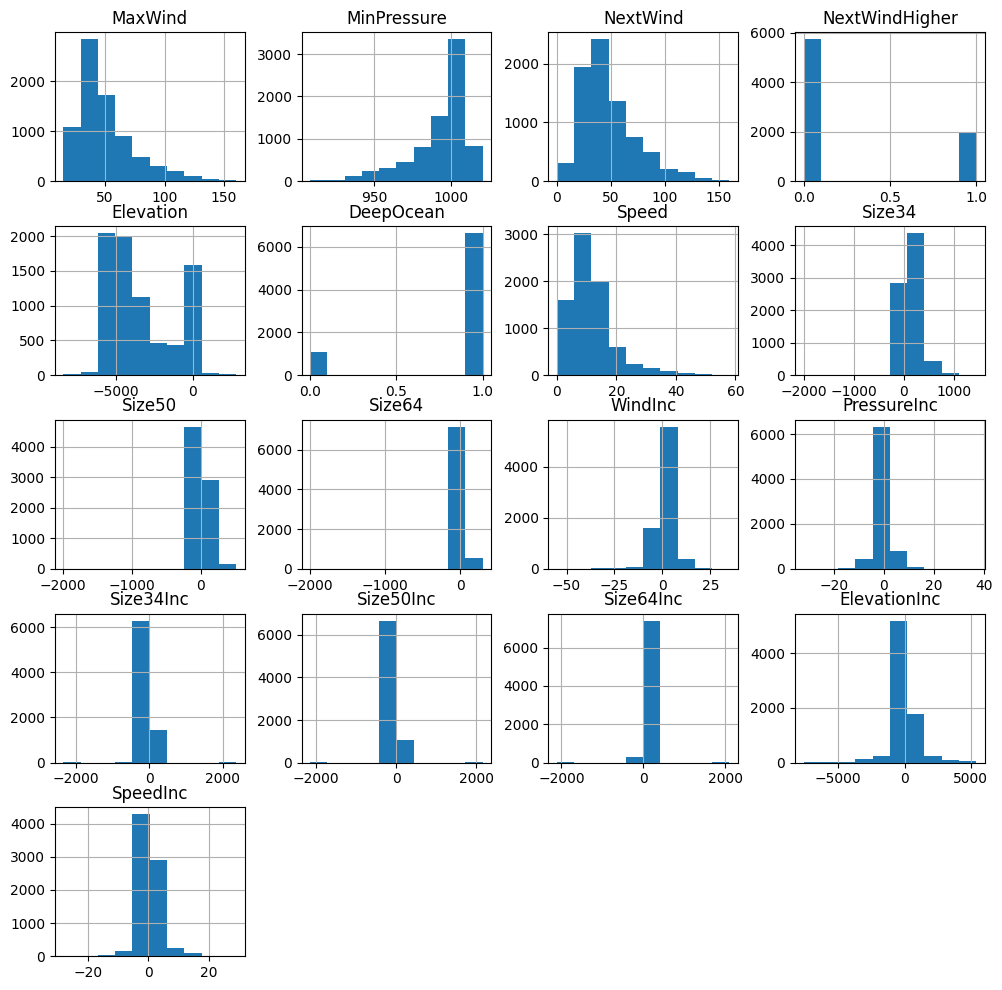

In [7]:
#histograms of all the columns in num_df
num_df.iloc[:, 1:].hist(figsize=(12,12))

<Axes: >

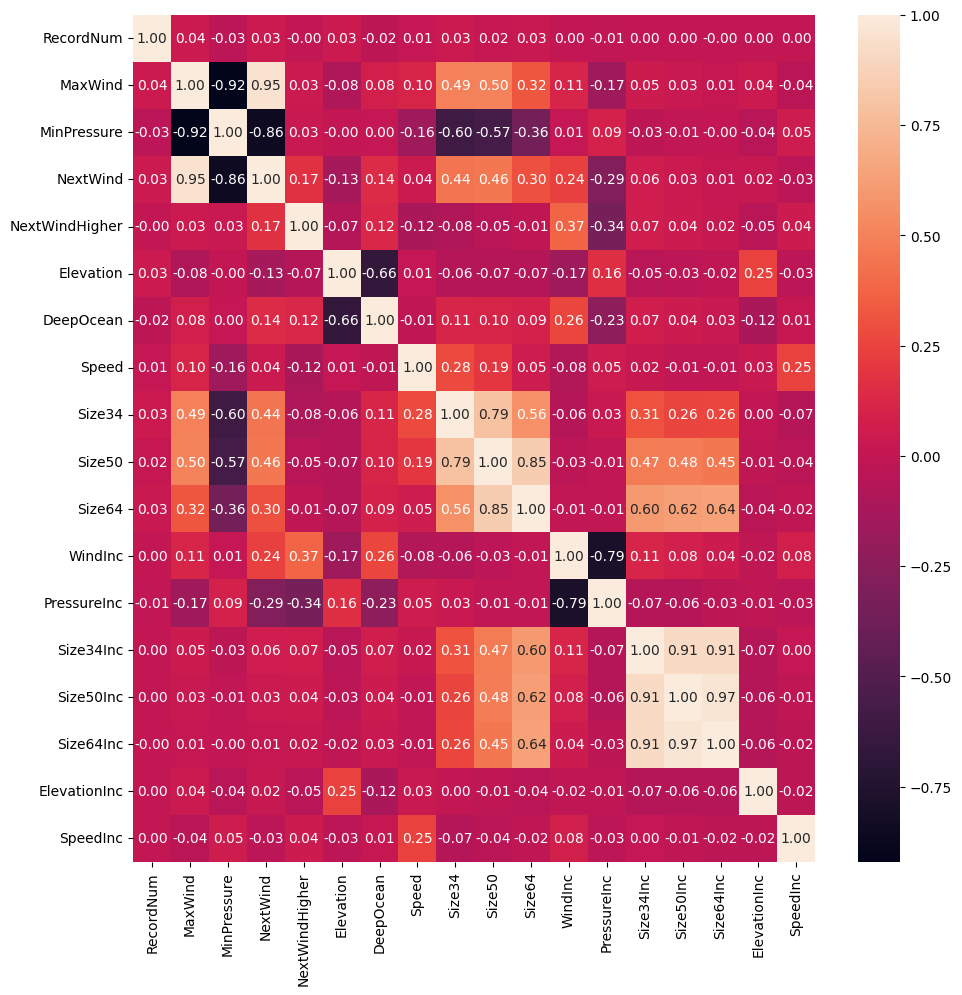

In [8]:
#Correlation heatmap of the numerical columns in the dataset
corr = num_df.corr()
fig, ax = plt.subplots(figsize = (11,11))
sns.heatmap(corr, annot=True, ax = ax, fmt =".2f" )

In [9]:
#removed columns that were highly correlated with other columns besides deep ocean
num_df = num_df.drop(['Size34Inc', 'Size50Inc', 'Size64Inc', 'RecordNum', 'MaxWind','NextWind'], axis = 1)

<Axes: >

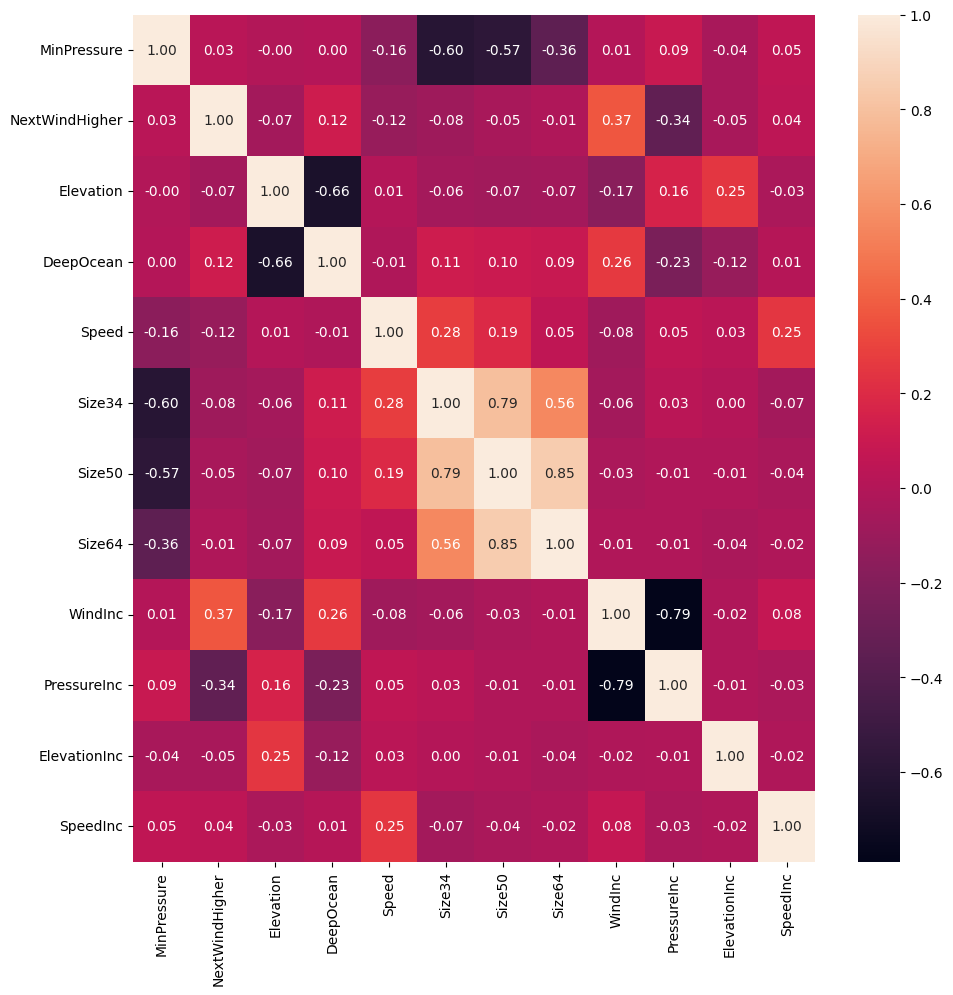

In [10]:
#showed correlation heatmap after removing columns 
corr_num = num_df.corr()
fig, ax = plt.subplots(figsize = (11,11))
sns.heatmap(corr_num, annot=True, ax = ax, fmt =".2f" )

In [11]:
#establish predictors and response variables for logistic regression and lda
X = num_df.drop(['NextWindHigher'], axis = 1)
Y = num_df['NextWindHigher']
print("head of X:",'\n', X, '\n')
print("head of Y:", '\n', Y,'\n')
("number of observations for Y:", '\n', Y.value_counts())

head of X: 
       MinPressure  Elevation  DeepOcean  Speed  Size34  Size50  Size64  \
0            1008      -5050          1      0       0       0       0   
1            1005      -4786          1     13       0       0       0   
2            1002      -3922          1     12      60       0       0   
3             996      -3826          1     11      75      20       0   
4             991      -3900          1      9      75      20       0   
...           ...        ...        ...    ...     ...     ...     ...   
7721          989          4          0     15     300       0       0   
7722          992          0          0     15     300       0       0   
7723          996         49          0     12       0       0       0   
7724          999        235          0     19       0       0       0   
7725         1000        844          0     22       0       0       0   

      WindInc  PressureInc  ElevationInc  SpeedInc  
0           0            0             0     

('number of observations for Y:',
 '\n',
 NextWindHigher
 0    5737
 1    1989
 Name: count, dtype: int64)

In [12]:
# scaled the predictors since they are in different units
scale = StandardScaler()
X_n = scale.fit_transform(X)
X = pd.DataFrame(X_n, columns=X.columns)

X.head()

,MinPressure,Elevation,DeepOcean,Speed,Size34,Size50,Size64,WindInc,PressureInc,ElevationInc,SpeedInc
0,0.767151,-0.817620,0.403334,-1.462122,-0.852972,-0.441157,-0.177993,-0.009208,0.046942,-0.048376,-0.152527
1,0.605842,-0.692213,0.403334,0.220038,-0.852972,-0.441157,-0.177993,0.926867,-0.832617,0.238528,3.537140
2,0.444534,-0.281790,0.403334,0.090641,-0.504141,-0.441157,-0.177993,0.926867,-0.832617,0.890581,-0.436347
3,0.121917,-0.236188,0.403334,-0.038755,-0.416933,-0.229682,-0.177993,2.799017,-1.712176,0.055953,-0.436347
4,-0.146930,-0.271340,0.403334,-0.297549,-0.416933,-0.229682,-0.177993,1.862942,-1.418989,-0.128796,-0.720168


In [13]:
# split the data into a 60, 40 split where 60% of the data is training and 40% of the data is validation 
seed = 7
x_train, x_valid, y_train, y_valid = train_test_split(X,Y, random_state=seed, test_size=.4)
#displayed the first 5 rows of the predictors in the training subset
x_train.head()

,MinPressure,Elevation,DeepOcean,Speed,Size34,Size50,Size64,WindInc,PressureInc,ElevationInc,SpeedInc
1557,0.444534,-0.817145,0.403334,-1.073931,-0.504141,-0.441157,-0.177993,0.926867,-0.832617,0.009222,0.698935
3197,0.552073,1.381752,0.403334,0.737626,-0.852972,-0.441157,-0.177993,-0.945283,0.046942,2.981499,-1.003989
3006,0.229456,-0.114581,0.403334,0.220038,-0.504141,-0.441157,-0.177993,-0.009208,-0.246245,0.386326,-0.152527
584,0.552073,0.238364,0.403334,-0.685740,-0.678556,-0.441157,-0.177993,0.926867,-0.832617,0.229834,1.550396
1905,-1.061011,-0.686988,0.403334,0.478832,-0.097170,0.299004,0.257999,0.926867,-2.298548,-0.703690,-0.720168


In [14]:
#checked the number of observations of the response variable per class
y_train.value_counts()

NextWindHigher
0    3441
1    1194
Name: count, dtype: int64

In [15]:
# performed a grid search on logistic regression model using the training data in order to find the best C value 
grid_params = {'C': [0.001, 0.01, 1, 7,8,9,10,]}

grid_search = GridSearchCV(LogisticRegression(penalty='l2'), grid_params, cv=5)

grid_search.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 1, 7, 8, 9, 10]})

In [16]:
#outputted the best C, and the best score 
print(grid_search.best_estimator_)
print(grid_search.best_score_)

LogisticRegression(C=1)
0.7773462783171521


In [17]:
# fitted logisitc regression model where C is 1 using training for fitting. Used classification summary to assess how well it predicts on the training and validation set, this includes the sensitivity and specificity
logit = LogisticRegression(C=1)

logit.fit(x_train, y_train)

classificationSummary(y_train, logit.predict(x_train))
print("specificity:", 3249/(3249+192))
print("sensitivity:", 357/(837+357))
classificationSummary(y_valid, logit.predict(x_valid))

print("specificity:", 2184/(2184+110))
print("sensitivity:", 219/(576+219))

Confusion Matrix (Accuracy 0.7780)

       Prediction
Actual    0    1
     0 3249  192
     1  837  357
specificity: 0.944202266782912
sensitivity: 0.2989949748743719
Confusion Matrix (Accuracy 0.7781)

       Prediction
Actual    0    1
     0 2186  110
     1  576  219
specificity: 0.9520488230165649
sensitivity: 0.27547169811320754


In [18]:
# This will display the training sensitivity and specificity for each corresponding cutoff value for the logistic regression model, along with the classification report of the training data. Then 
# the best cutoff value will be used on the validation data displaying the classification report, and the senstivity and specificity



pred = logit.predict_proba(x_train)[:,1]
c_off = 0.5
pred_val = np.where(pred>=c_off, 1, 0)
class_report = classification_report(y_train, pred_val, output_dict=True)

while class_report['0']['recall'] >= class_report['1']['recall']:
    c_off = round(c_off - 0.001,3)
    pred_val = np.where(pred>=c_off, 1, 0)
    class_report = classification_report(y_train, pred_val, output_dict=True)

print('cutoff: ', c_off)
print('train 1 accuracy: ', class_report['1']['recall'])
print('train 0 accuracy: ', class_report['0']['recall'])

c2 = c_off+.001


pred_val = np.where(pred>=c2, 1, 0)
class_report2 = classification_report(y_train, pred_val, output_dict=True)
print('cutoff: ', c2)
print('train 1 accuracy: ', class_report2['1']['recall'])
print('train 0 accuracy: ', class_report2['0']['recall'])
print(classification_report(y_train, pred_val))
print('macro accuracy:', class_report2['macro avg']['recall'])
pred2 = logit.predict_proba(x_valid)[:,1]
pred_val2 = np.where(pred2>=c2, 1,0)
class_report3= classification_report(y_valid, pred_val2, output_dict=True)
print('cutoff: ', c2)
print('valid 1 accuracy: ', class_report3['1']['recall'])
print('valid 0 accuracy: ', class_report3['0']['recall'])



cutoff:  0.261
train 1 accuracy:  0.7294807370184254
train 0 accuracy:  0.7282766637605347
cutoff:  0.262
train 1 accuracy:  0.7244556113902848
train 0 accuracy:  0.7306015693112468
              precision    recall  f1-score   support

           0       0.88      0.73      0.80      3441
           1       0.48      0.72      0.58      1194

    accuracy                           0.73      4635
   macro avg       0.68      0.73      0.69      4635
weighted avg       0.78      0.73      0.74      4635

macro accuracy: 0.7275285903507658
cutoff:  0.262
valid 1 accuracy:  0.7220125786163522
valid 0 accuracy:  0.7277874564459931


In [19]:
# This will display the classification report for logisitic regression model with the updated cutoff value using the validation data, along with the macro accuracy, and recall scores.
p = classification_report(y_valid, pred_val2, output_dict=True)
print(classification_report(y_valid, pred_val2))
print(classificationSummary(y_valid, pred_val2))
print(p['macro avg']['recall'])
print(p['0']['recall'])
print(p['1']['recall'])

              precision    recall  f1-score   support

           0       0.88      0.73      0.80      2296
           1       0.48      0.72      0.58       795

    accuracy                           0.73      3091
   macro avg       0.68      0.72      0.69      3091
weighted avg       0.78      0.73      0.74      3091

Confusion Matrix (Accuracy 0.7263)

       Prediction
Actual    0    1
     0 1671  625
     1  221  574
None
0.7249000175311726
0.7277874564459931
0.7220125786163522


In [20]:
# fitted lda model using training for fitting. Used classification summary to assess how well it predicts on the training data and validation data. The sensitivity and specificity are displayed as well for both subsets. 
lda = LinearDiscriminantAnalysis()

lda.fit(x_train, y_train)

print(lda.intercept_)
print(lda.coef_)
print(classificationSummary(y_train, lda.predict(x_train)),'\n')
print("specificity:", 3341/(3341+100))
print("sensitivity:", 218/(976+218))
print(classificationSummary(y_valid, lda.predict(x_valid)))
print("specificity:", 2229/(2229+67))
print("sensitivity:", 142/(653+142))

[-1.29914929]
[[-0.01796405  0.1107679   0.14974275 -0.18284626 -0.19928863  0.03303291
   0.03388422  0.72399618 -0.3068585  -0.0958443   0.07088075]]
Confusion Matrix (Accuracy 0.7679)

       Prediction
Actual    0    1
     0 3341  100
     1  976  218
None 

specificity: 0.9709386806161
sensitivity: 0.18257956448911222
Confusion Matrix (Accuracy 0.7671)

       Prediction
Actual    0    1
     0 2229   67
     1  653  142
None
specificity: 0.9708188153310104
sensitivity: 0.17861635220125785


In [26]:
# This will display the training sensitivity and specificity for each corresponding cutoff value for the lda model, along with the classification report of the training data and macro avg. 
pred_lda = lda.predict_proba(x_train)[:,1]
c_off = 0.5
pred_val_lda = np.where(pred>=c_off, 1, 0)
class_report_lda = classification_report(y_train, pred_val_lda, output_dict=True)

while class_report_lda['0']['recall'] >= class_report_lda['1']['recall']:
    c_off = round(c_off - 0.001,3)
    pred_val_lda = np.where(pred>=c_off, 1, 0)
    class_report_lda = classification_report(y_train, pred_val_lda, output_dict=True)

print('cutoff: ', c_off)
print('train 1 accuracy: ', class_report_lda['1']['recall'])
print('train 0 accuracy: ', class_report_lda['0']['recall'])



pred_val_lda2 = np.where(pred_lda>=.261, 1, 0)
class_report2_lda = classification_report(y_train, pred_val_lda2, output_dict=True)
print('cutoff: ', c_off)
print('train 1 accuracy: ', class_report2_lda['1']['recall'])
print('train 0 accuracy: ', class_report2_lda['0']['recall'])
print(classification_report(y_train, pred_val_lda2))
print(classificationSummary(y_train, pred_val_lda2))
print(class_report2_lda['macro avg']['recall'])

cutoff:  0.261
train 1 accuracy:  0.7294807370184254
train 0 accuracy:  0.7282766637605347
cutoff:  0.261
train 1 accuracy:  0.7035175879396985
train 0 accuracy:  0.7567567567567568
              precision    recall  f1-score   support

           0       0.88      0.76      0.81      3441
           1       0.50      0.70      0.59      1194

    accuracy                           0.74      4635
   macro avg       0.69      0.73      0.70      4635
weighted avg       0.78      0.74      0.75      4635

Confusion Matrix (Accuracy 0.7430)

       Prediction
Actual    0    1
     0 2604  837
     1  354  840
None
0.7301371723482277


In [22]:
# This code block will display the sensitivity and specificity of the lda model with the adjusted cutoff value, along with the classification report along with the macro avg using the validation data. 
pred3 = lda.predict_proba(x_valid)[:,1]
pred_val_lda3 = np.where(pred3>=c2, 1,0)
class_report3_lda= classification_report(y_valid, pred_val_lda3, output_dict=True)
print('cutoff: ', c2)
print('valid 1 accuracy: ', class_report3_lda['1']['recall'])
print('valid 0 accuracy: ', class_report3_lda['0']['recall'])
print()
print(classification_report(y_valid, pred_val_lda3))
print(classificationSummary(y_valid, pred_val_lda3))
print(class_report3_lda['macro avg']['recall'])

cutoff:  0.261
valid 1 accuracy:  0.6867924528301886
valid 0 accuracy:  0.7630662020905923

              precision    recall  f1-score   support

           0       0.88      0.76      0.82      2296
           1       0.50      0.69      0.58       795

    accuracy                           0.74      3091
   macro avg       0.69      0.72      0.70      3091
weighted avg       0.78      0.74      0.75      3091

Confusion Matrix (Accuracy 0.7434)

       Prediction
Actual    0    1
     0 1752  544
     1  249  546
None
0.7249293274603905
